# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/forest/MDST-Tutorial/tutorial1


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [17]:
#statesDS = pd.read_csv("data/states_edu.csv")
statesDS = pd.read_csv("/Users/forest/MDST-Tutorial/data/states_edu.csv")
print(statesDS)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [15]:
# @@@ 1
# Your Code
print("years in dataset:", statesDS['YEAR'].nunique())

years in dataset: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [21]:
# @@@ 2

michigan_data = statesDS[statesDS['STATE'] == 'MICHIGAN']
ohio_data = statesDS[statesDS['STATE'] == 'OHIO']

michigan_avg = michigan_data['AVG_MATH_8_SCORE'].dropna().mean()
ohio_avg = ohio_data['AVG_MATH_8_SCORE'].dropna().mean()

print(f"Michigan Grade 8 Math Average: {michigan_avg:.2f}")
print(f"Ohio Grade 8 Math Average: {ohio_avg:.2f}")

if michigan_avg > ohio_avg:
    print("Michigan has the higher average")
else:
    print("Ohio has the higher average")

Michigan Grade 8 Math Average: 276.17
Ohio Grade 8 Math Average: 282.25
Ohio has the higher average


Find the average for your chosen test across all states in 2019

In [25]:
# @@@ 3
data_2019 = statesDS[statesDS['YEAR'] == 2019]
grade8_math_2019 = data_2019['AVG_MATH_8_SCORE'].dropna()
average_2019 = grade8_math_2019.mean()
print(average_2019)

281.2641509433962


For each state, find a maximum value for your chosen test score

In [28]:
# @@@ 4
stateMaxScores = statesDS.groupby('STATE')['AVG_MATH_8_SCORE'].max()
stateMaxScores = stateMaxScores.dropna()
stateMaxScores = stateMaxScores.sort_values(ascending = False)
print("Max grade 8 math scores by state:")
print(stateMaxScores)

Max grade 8 math scores by state:
STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAWARE                284.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [36]:
# @@@ 5

# Create all features
expenditurePerStudent = statesDS['expenditure_per_student'] = statesDS['TOTAL_EXPENDITURE'] / statesDS['ENROLL']
instructionPerStudent = statesDS['instruction_per_student'] = statesDS['INSTRUCTION_EXPENDITURE'] / statesDS['ENROLL']


print("Features created:")

print("\nExpenditure per student stats:")
print(expenditurePerStudent.describe())

print("\nInstruction per student stats:")
print(instructionPerStudent.describe())

Features created:

Expenditure per student stats:
count    1224.000000
mean       10.223925
std         4.057989
min         3.542816
25%         7.232154
50%         9.574723
75%        12.031768
max        29.616741
dtype: float64

Instruction per student stats:
count    1224.000000
mean        5.285635
std         2.130314
min         1.907593
25%         3.791709
50%         4.944937
75%         6.156276
max        16.968527
dtype: float64


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I created expenditure_per_student and instruction_per_student to normalize spending by enrollment, allowing fair
comparison between states regardless of size. Instruction_per_student focuses specifically on direct teaching
investments, which should correlate more strongly with academic outcomes than general administrative spending.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

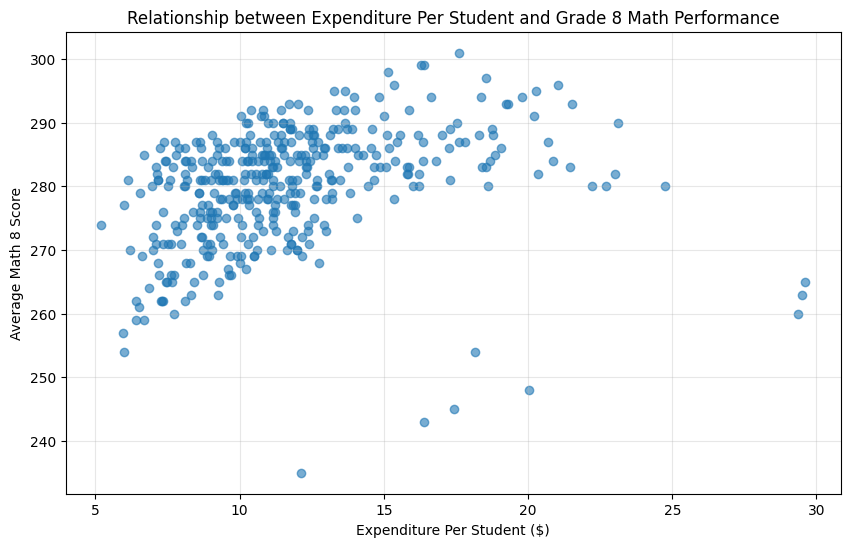

Correlation coefficient: 0.281
R-squared (variance explained): 0.079 or 7.9%


In [41]:
# @@@ 6
clean_data = statesDS[['AVG_MATH_8_SCORE',
'expenditure_per_student']].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(clean_data['expenditure_per_student'],
clean_data['AVG_MATH_8_SCORE'], alpha=0.6)
plt.xlabel('Expenditure Per Student ($)')
plt.ylabel('Average Math 8 Score')
plt.title('Relationship between Expenditure Per Student and Grade 8 Math Performance')
plt.grid(True, alpha=0.3)
plt.show()

correlation = clean_data['expenditure_per_student'].corr(clean_data['AVG_MATH_8_SCORE'])
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R-squared (variance explained): {correlation**2:.3f} or {correlation**2*100:.1f}%")

The correlation coefficient of 0.281 indicates a weak-to-moderate positive relationship between expenditure per
student and Grade 8 math scores. taking 0.281^2 will help us find the % of variance in math scores, which is about 0.079 or 7.9%. Around 92% of the variation in scores comes from other factors. While there's a general upward trend, the relationship is not strong enough to confidently predict that increasing expenditure will lead to higher math scores. There seems to be many other factors that would help explain the average 8th grade math score (because of the explanation for the other 92% in variance). We are only taking a small look at the whole pie, we aren't factoring in a plethora of other things like teacher quality, curriculum, home life, outside the classroom resources, etc.

**<CAPTION FOR VIZ 1>**

**Visualization 2**

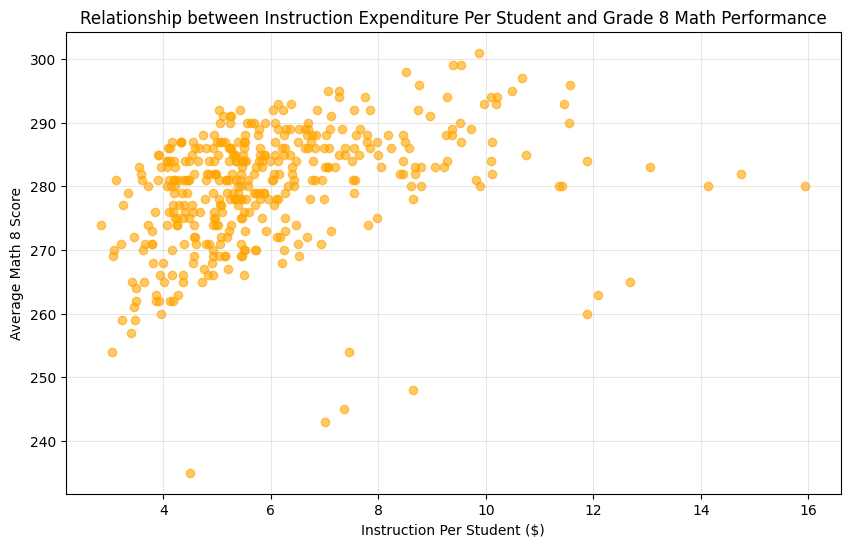

Correlation coefficient: 0.349
R-squared (variance explained): 0.121 or 12.1%


In [40]:
# @@@ 7
clean_data2 = statesDS[['AVG_MATH_8_SCORE', 'instruction_per_student']].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(clean_data2['instruction_per_student'], clean_data2['AVG_MATH_8_SCORE'], alpha=0.6, color='orange')
plt.xlabel('Instruction Per Student ($)')
plt.ylabel('Average Math 8 Score')
plt.title('Relationship between Instruction Expenditure Per Student and Grade 8 Math Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate correlation
correlation2 = clean_data2['instruction_per_student'].corr(clean_data2['AVG_MATH_8_SCORE'])
print(f"Correlation coefficient: {correlation2:.3f}")
print(f"R-squared (variance explained): {correlation2**2:.3f} or {correlation2**2*100:.1f}%")

**<CAPTION FOR VIZ 2>**

Our second visualization shows a stronger relationship between instruction expenditure per student and Grade 8 math
performance. The correlation coefficient of 0.349 indicates a moderate positive relationship, which is notably
stronger than our first visualization (0.281). The R² value of 0.121 means that instruction spending per student
explains 12.1% of the variance in math scores—a 50% improvement over total expenditure per student (8%).

This suggests that how money is spent may be more important than how much is spent overall. Direct investment in
instruction appears to have a more meaningful impact on student outcomes than general educational expenditure. 
Similarily, like in the 1st visualization, we're still only capturing a small portion of the factors influencing math performance, as 87.9% of the
variance remains unexplained. Other critical factors like teacher quality, curriculum quality, socioeconomic
background, and home support likely play larger roles in determining student achievement.

The improved correlation with instruction spending supports the hypothesis that targeted educational investments
yield better academic results than broad expenditure increases

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# @@@ 8


model_data = statesDS[['expenditure_per_student', 'instruction_per_student', 'AVG_MATH_8_SCORE']].dropna()

X = model_data[['expenditure_per_student', 'instruction_per_student']]
y = model_data['AVG_MATH_8_SCORE']

In [49]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [50]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [51]:
# @@@ 11
# create your model here
# model = 
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [56]:
# @@@ 12
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mean_squared_err_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_err_test)

print("Model Performance:")
print(f"Training R² Score: {r2_train:.3f}")
print(f"Test R² Score: {r2_test:.3f}")
print(f"Test RMSE: {rmse_test:.2f} points")

if r2_train - r2_test > 0.1:
    print("Warning: Possible overfitting detected")
else:
    print("Model generalizes well to test data")

Model Performance:
Training R² Score: 0.159
Test R² Score: 0.127
Test RMSE: 8.70 points
Model generalizes well to test data


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

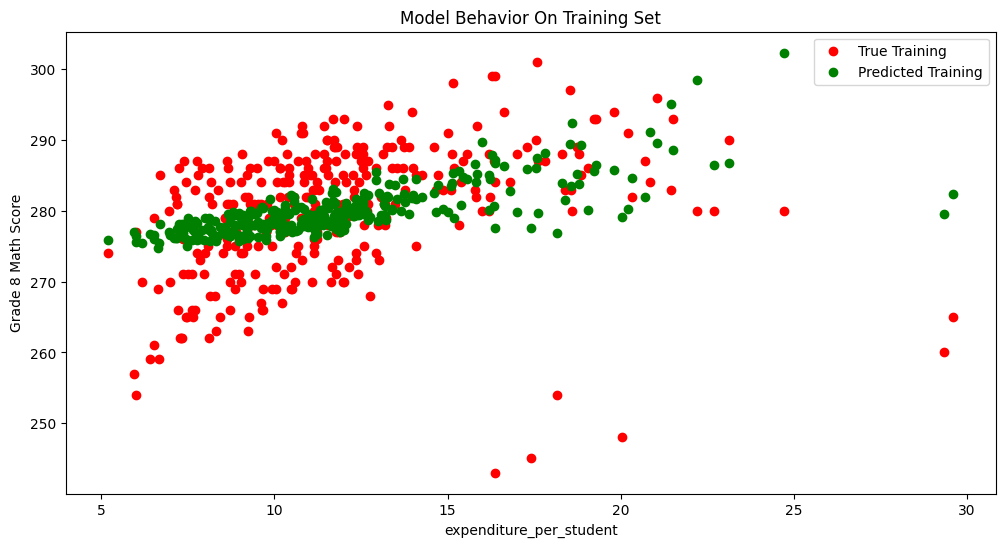

In [58]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 8 Math Score')
plt.title("Model Behavior On Training Set")
plt.show()

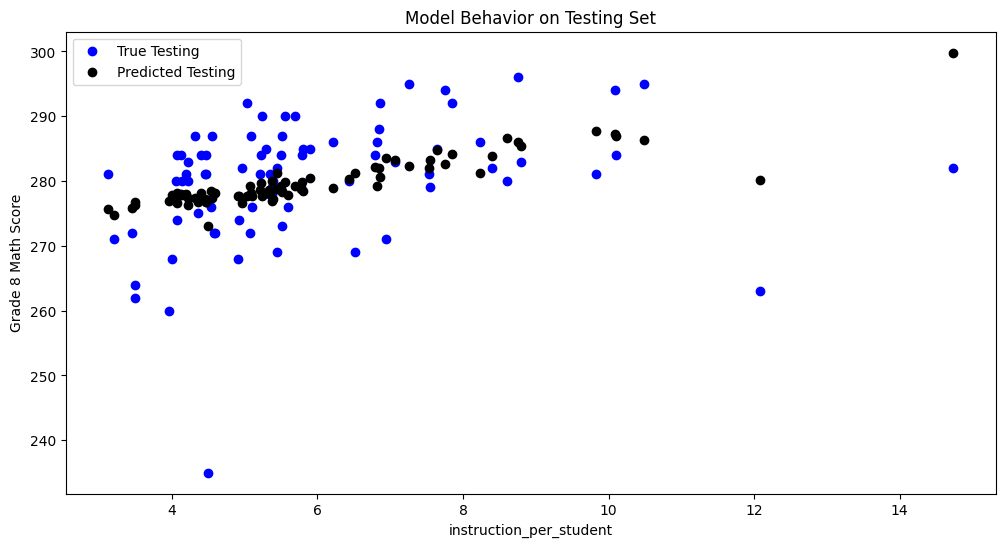

In [63]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

col_name = 'instruction_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True Testing','Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 8 Math Score')
plt.title("Model Behavior on Testing Set")
plt.show()